## Filtrando dígitos 1 e 5

In [1]:
# Bibliotecas padrão
import numpy as np
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler

import sys, os
sys.path.append(os.path.abspath('..'))

# Classes e funções personalizadas
from models.PLA import PocketPLA
from models.LinReg import RegressaoLinear
from models.LogReg import RegressaoLogistica
from analysis.compare_models import avaliar_modelo
from analysis.plot_results import (
    plot_model_results_normalized,
    plot_all_models_comparison
)

In [2]:
train_redu = pd.read_csv("../dataset_digits/train_redu.csv")
test_redu  = pd.read_csv("../dataset_digits/test_redu.csv")

print("Train shape:", train_redu.shape)
print("Test shape:", test_redu.shape)
print(train_redu.head())

Train shape: (2186, 3)
Test shape: (1115, 3)
   label  intensidade   simetria
0      0    145.43529  148.57256
1      0    118.57647  137.11372
2      0    127.60000  134.04706
3      0    138.04706  151.00392
4      0    146.21568  122.50196


In [3]:
train1x5 = train_redu[train_redu["label"].isin([1, 5])].copy()
test1x5  = test_redu[test_redu["label"].isin([1, 5])].copy()

# Criação da variável-alvo y (+1 para dígito 1 e -1 para dígito 5)
train1x5["y"] = train1x5["label"].apply(lambda x: 1 if x == 1 else -1)
test1x5["y"]  = test1x5["label"].apply(lambda x: 1 if x == 1 else -1)

In [4]:
X_train_1x5 = train1x5[["intensidade", "simetria"]].values.astype(float)
y_train = train1x5["y"].values.astype(int)

X_test_1x5 = test1x5[["intensidade", "simetria"]].values.astype(float)
y_test = test1x5["y"].values.astype(int)

# Escalonamento dos dados (0 a 1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_1x5)
X_test  = scaler.transform(X_test_1x5)

print("\n--- Verificação das dimensões ---")
print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)


--- Verificação das dimensões ---
Tamanho treino: (1184, 2)
Tamanho teste: (583, 2)


## Treinando modelos: Perceptron, Regressão Linear e Regressão Logística

In [5]:
# === Treina o modelo PocketPLA ===
perceptron = PocketPLA()
perceptron.execute(X_train, y_train)

print("\n--- Vetor de pesos treinado ---")
print(perceptron.w)

y_pred = np.array([perceptron.h(x) for x in X_test])
print("\n--- Predições no conjunto de teste ---")
print(y_pred[:20])


--- Vetor de pesos treinado ---
[ 1.         -1.44433724 -1.10248698]

--- Predições no conjunto de teste ---
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
# === Treinando Regressão Linear ===
linreg = RegressaoLinear()
linreg.execute(X_train, y_train)

print("--- Vetor de pesos (Regressão Linear) ---")
print(linreg.get_w())

print("\nPredições (valores contínuos):", linreg.predict(X_test)[:10])
print("Predições (classe):", linreg.predict(X_test, class_output=True)[:10])

--- Vetor de pesos (Regressão Linear) ---
[ 1.54070957 -1.37154157 -1.76466441]

Predições (valores contínuos): [1.11040128 0.82239142 1.21178615 0.9051132  0.97139312 1.11508664
 0.72707648 0.6534267  1.36058649 1.2074245 ]
Predições (classe): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# === Treinando Regressão Logística ===
logreg = RegressaoLogistica(eta=0.1, tmax=5000, lambda_=0.01)
logreg.execute(X_train, y_train)

print("--- Vetor de pesos (Regressão Logística) ---")
print(logreg.get_w())

print("Predições (classe):", logreg.predict(X_test)[:10])
print("Probabilidades (sigmoid):", logreg.predict_prob(X_test)[:10])

--- Vetor de pesos (Regressão Logística) ---
[ 3.3208915  -3.2816977  -3.47746871]
Predições (classe): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Probabilidades (sigmoid): [0.91775504 0.86346748 0.93497744 0.88232557 0.88989013 0.91579963
 0.83661439 0.81325319 0.94927777 0.93386676]


## Avaliando modelos de predição

In [8]:
avaliar_modelo("Perceptron", perceptron, X_train, y_train, X_test, y_test)


=== Perceptron | Treinamento ===
[[576   0]
 [  0 608]]
               precision    recall  f1-score   support

Dígito 5 (-1)       1.00      1.00      1.00       576
Dígito 1 (+1)       1.00      1.00      1.00       608

     accuracy                           1.00      1184
    macro avg       1.00      1.00      1.00      1184
 weighted avg       1.00      1.00      1.00      1184

Acurácia (val): 100.00%

=== Perceptron | Teste ===
[[291   0]
 [  0 292]]
               precision    recall  f1-score   support

Dígito 5 (-1)       1.00      1.00      1.00       291
Dígito 1 (+1)       1.00      1.00      1.00       292

     accuracy                           1.00       583
    macro avg       1.00      1.00      1.00       583
 weighted avg       1.00      1.00      1.00       583

Acurácia (test): 100.00%


In [9]:
avaliar_modelo("Regressão Linear", linreg, X_train, y_train, X_test, y_test)


=== Regressão Linear | Treinamento ===
[[576   0]
 [  0 608]]
               precision    recall  f1-score   support

Dígito 5 (-1)       1.00      1.00      1.00       576
Dígito 1 (+1)       1.00      1.00      1.00       608

     accuracy                           1.00      1184
    macro avg       1.00      1.00      1.00      1184
 weighted avg       1.00      1.00      1.00      1184

Acurácia (val): 100.00%

=== Regressão Linear | Teste ===
[[291   0]
 [  0 292]]
               precision    recall  f1-score   support

Dígito 5 (-1)       1.00      1.00      1.00       291
Dígito 1 (+1)       1.00      1.00      1.00       292

     accuracy                           1.00       583
    macro avg       1.00      1.00      1.00       583
 weighted avg       1.00      1.00      1.00       583

Acurácia (test): 100.00%


In [10]:
avaliar_modelo("Regressão Logística", logreg, X_train, y_train, X_test, y_test)


=== Regressão Logística | Treinamento ===
[[576   0]
 [  0 608]]
               precision    recall  f1-score   support

Dígito 5 (-1)       1.00      1.00      1.00       576
Dígito 1 (+1)       1.00      1.00      1.00       608

     accuracy                           1.00      1184
    macro avg       1.00      1.00      1.00      1184
 weighted avg       1.00      1.00      1.00      1184

Acurácia (val): 100.00%

=== Regressão Logística | Teste ===
[[291   0]
 [  0 292]]
               precision    recall  f1-score   support

Dígito 5 (-1)       1.00      1.00      1.00       291
Dígito 1 (+1)       1.00      1.00      1.00       292

     accuracy                           1.00       583
    macro avg       1.00      1.00      1.00       583
 weighted avg       1.00      1.00      1.00       583

Acurácia (test): 100.00%


## Plotando retas de separação

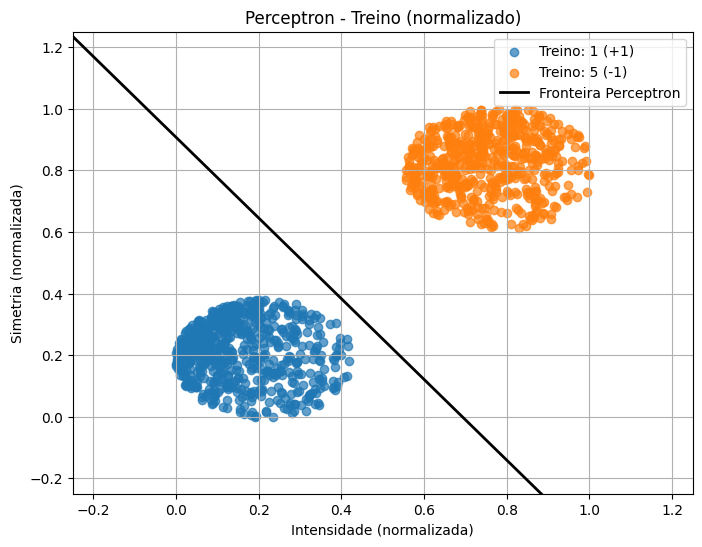

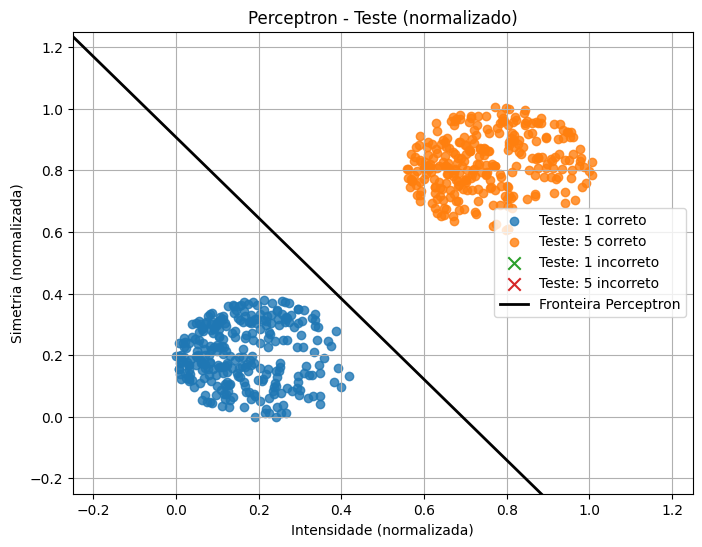

In [11]:
# === Plotando resultados do PLA ===
plot_model_results_normalized(perceptron, X_train_1x5, y_train, X_test_1x5, y_test, scaler, "Perceptron")

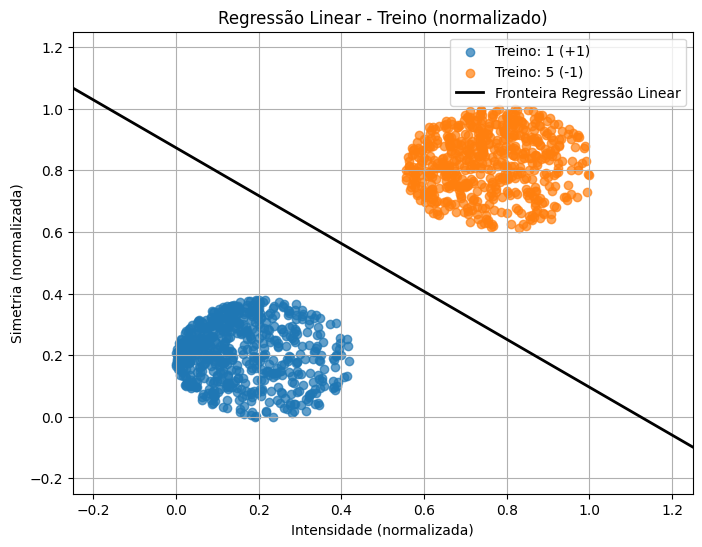

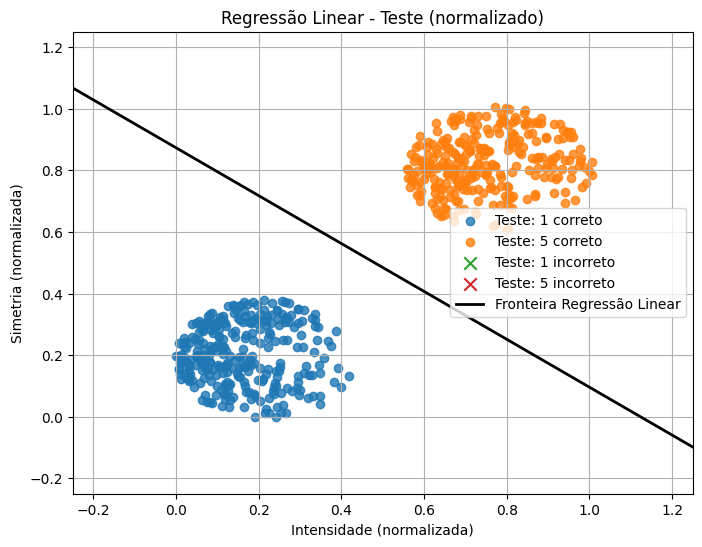

In [12]:
# === Plotando resultados da Regressão Linear ===
plot_model_results_normalized(linreg, X_train_1x5, y_train, X_test_1x5, y_test, scaler, "Regressão Linear")

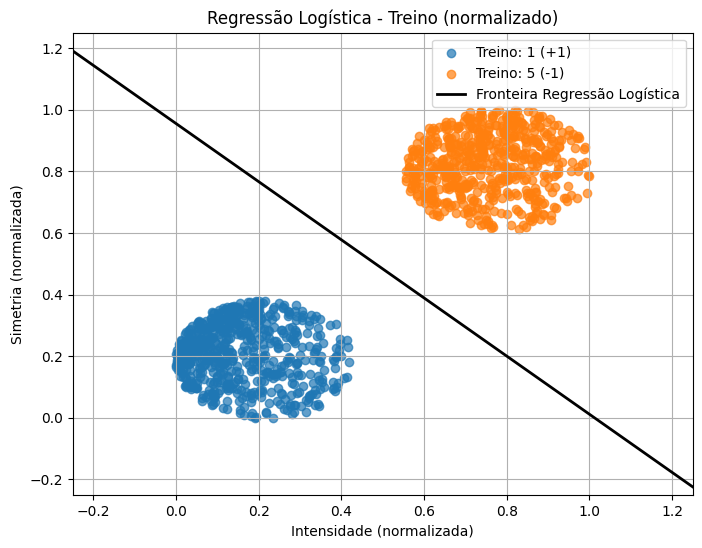

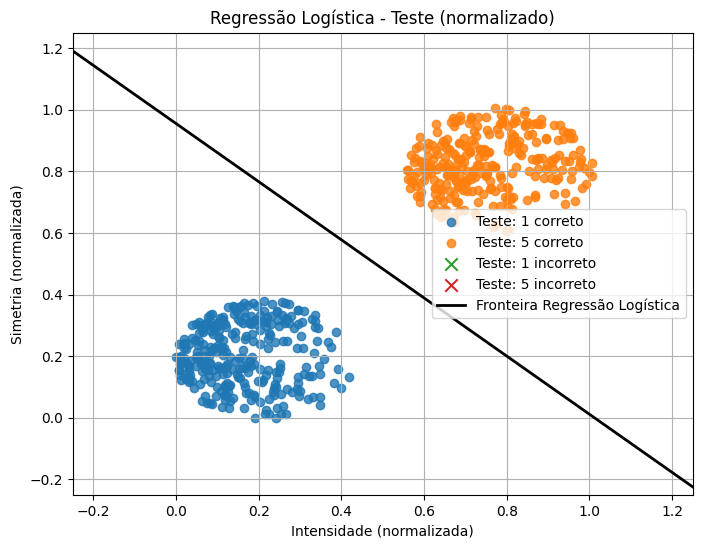

In [13]:
# === Plotando resultados da Regressão Logística ===
plot_model_results_normalized(logreg, X_train_1x5, y_train, X_test_1x5, y_test, scaler, "Regressão Logística")

## Plotando as três retas para comparação

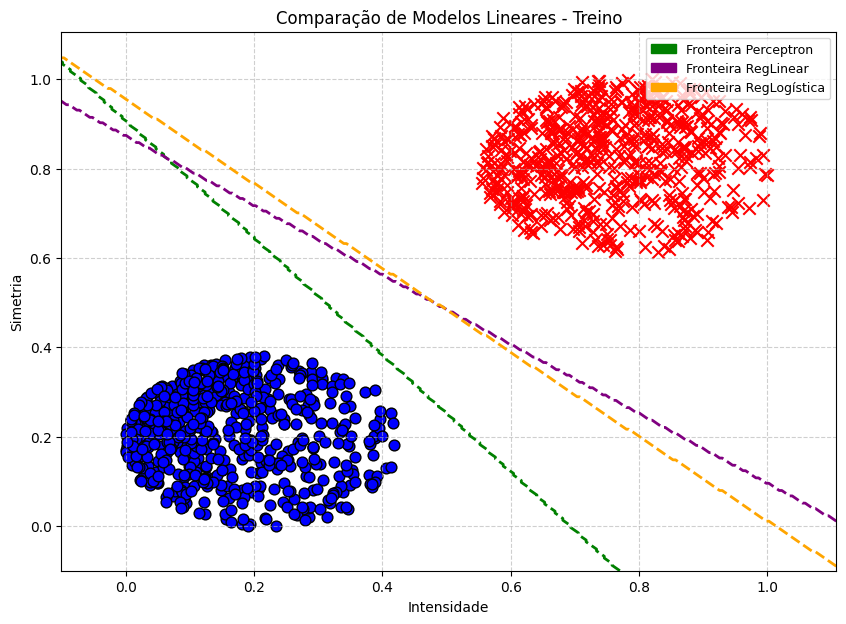

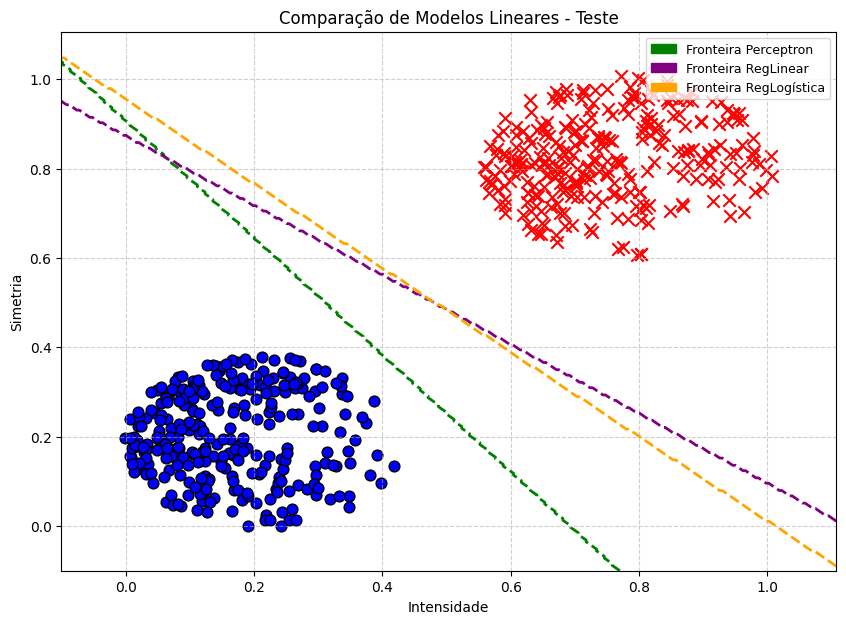

In [14]:
plot_all_models_comparison(X_train, y_train, X_test, y_test,
    models=[perceptron, linreg, logreg],
    model_names=["Perceptron", "RegLinear", "RegLogística"])